#📌 Extracción

¿Qué debes hacer?
✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [43]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

#🔧 Transformación

In [101]:
# Para los datos duplicados primero normalizamos
# Convertimos el DataFrame actual a una lista de diccionarios
new_dic = df.to_dict(orient='records')
# Usamos json_normalize sobre esa lista
df_final = pd.json_normalize(new_dic)

# Verificar el resultado
print("\n---- Nuevo DF ----")
print(df_final.head())

# Tipos de datos y si hay datos ocultos
print("\n---- Tipos de datos y si hay datos ocultos ----")
print(df_final.info())

#Suma de datos nulos
print("\n---- Suma de datos nulos ----")
print(df_final.isnull().sum())

# Ahora si, valores duplicados
print("\n---- Valores duplicados ----")
print(df_final.duplicated().sum())

df_final.describe(include='all')

#valores unicos
print("\n---- Valores unicos ----")
print(df_final.nunique())

#Manejo de inconsistencias
# 1. Convertir 'account.Charges.Total' a numérico
df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')
# Llenar nulos con 0
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(0)

# 2. Convertir 'customer.tenure' a numérico
df_final['customer.tenure'] = pd.to_numeric(df_final['customer.tenure'], errors='coerce')
# Llenar nulos con 0
df_final['customer.tenure'] = df_final['customer.tenure'].fillna(0)

# 3. Convertir 'customer.SeniorCitizen' a numérico
df_final['customer.SeniorCitizen'] = pd.to_numeric(df_final['customer.SeniorCitizen'], errors='coerce')
# Llenar nulos con 0
df_final['customer.SeniorCitizen'] = df_final['customer.SeniorCitizen'].fillna(0)

#2. Estandarizar categóricas (Simplificar "No internet service" -> "No")
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'phone.MultipleLines'
]
for col in cols_to_fix:
    # Solo reemplazamos si la columna existe (por seguridad)
    if col in df_final.columns:
        df_final[col] = df_final[col].replace({'No internet service': 'No', 'No phone service': 'No'})


df_final.head()




---- Nuevo DF ----
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.I

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [95]:
# Columna de cuentas diarias (Opcional)
# Crear columna 'Cuentas_Diarias'
df_final['Cuentas_Diarias'] = df_final['account.Charges.Monthly'] / 30

# Verificar el resultado (mostrando primeros 5 registros)
print("---- Verificación Cuentas Diarias ----")
df_final.head()

---- Verificación Cuentas Diarias ----


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [ ]:
# Análisis Descriptivo
# (Media, Mediana (50%), Desviación Estándar (std), Mín/Máx)
print("---- Estadísticas Generales (Numéricas) ----")
print(df_final.describe().T)

---- Estadísticas Generales (Numéricas) ----
                          count         mean          std        min  \
customer.SeniorCitizen   7267.0     0.162653     0.369074   0.000000   
customer.tenure          7267.0    32.346498    24.571773   0.000000   
account.Charges.Monthly  7267.0    64.720098    30.129572  18.250000   
account.Charges.Total    7267.0  2277.182035  2268.648587   0.000000   
Cuentas_Diarias          7267.0     2.157337     1.004319   0.608333   

                                25%          50%          75%          max  
customer.SeniorCitizen     0.000000     0.000000     0.000000     1.000000  
customer.tenure            9.000000    29.000000    55.000000    72.000000  
account.Charges.Monthly   35.425000    70.300000    89.875000   118.750000  
account.Charges.Total    396.200000  1389.200000  3778.525000  8684.800000  
Cuentas_Diarias            1.180833     2.343333     2.995833     3.958333  

---- Análisis por Churn (Abandono) ----
      customer.tenu

/var/folders/d5/jcz0rh097fjbnmn3mbl75qmm0000gn/T/ipykernel_4249/2364025070.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
/var/folders/d5/jcz0rh097fjbnmn3mbl75qmm0000gn/T/ipykernel_4249/2364025070.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mis_labels) # Usar las mismas etiquetas


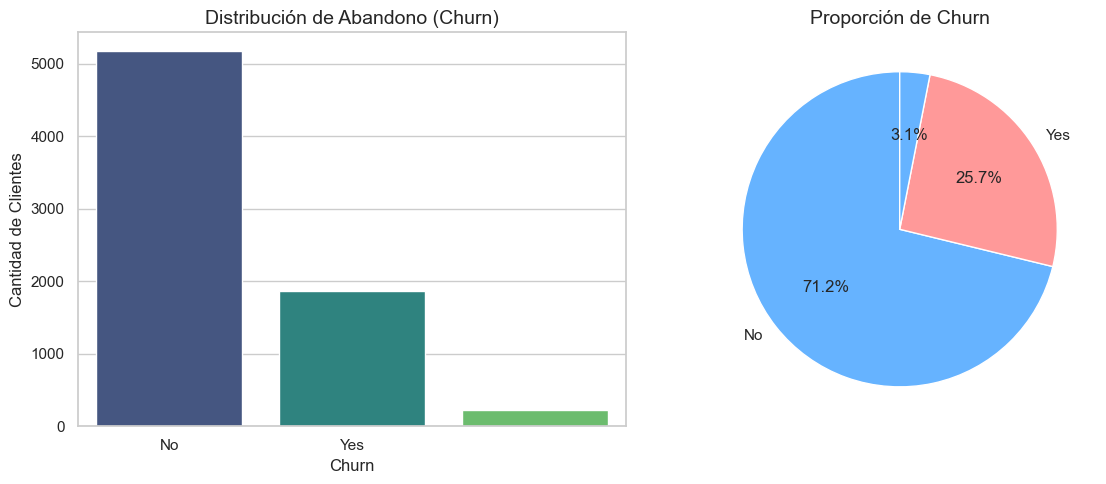

In [ ]:
# Distribución de evasión

import matplotlib.pyplot as plt
import seaborn as sns

# Obtener conteos
churn_counts = df_final['Churn'].value_counts()

# --- Verificación de Seguridad ---
if churn_counts.empty:
    print("⚠️ ALERTA: La columna 'Churn' parece estar vacía o llena de nulos.")
    print("Es probable que hayas ejecutado la celda de transformación (Yes->1) dos veces.")
    print("Por favor, vuelve a cargar el dataset desde el principio (Extraer -> Limpiar -> Estandarizar una sola vez).")
else:
    # Definir etiquetas dinámicamente según los índices encontrados (0 o 1)
    # Mapeamos 0->'No' y 1->'Sí'. Si hay otra cosa, la mostramos tal cual.
    mapa_etiquetas = {0: 'No (Se queda)', 1: 'Sí (Se va)'}
    mis_labels = [mapa_etiquetas.get(x, str(x)) for x in churn_counts.index]

    plt.figure(figsize=(12, 5))

    # --- Gráfico 1: Barras ---
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
    ax.set_xticklabels(mis_labels) # Usar las mismas etiquetas
    plt.title('Distribución de Abandono (Churn)', fontsize=14)
    plt.ylabel('Cantidad de Clientes')

    # --- Gráfico 2: Pastel ---
    plt.subplot(1, 2, 2)
    plt.pie(churn_counts, labels=mis_labels, autopct='%1.1f%%', 
            colors=['#66b3ff', '#ff9999'], startangle=90)
    plt.title('Proporción de Churn', fontsize=14)

    plt.tight_layout()
    plt.show()

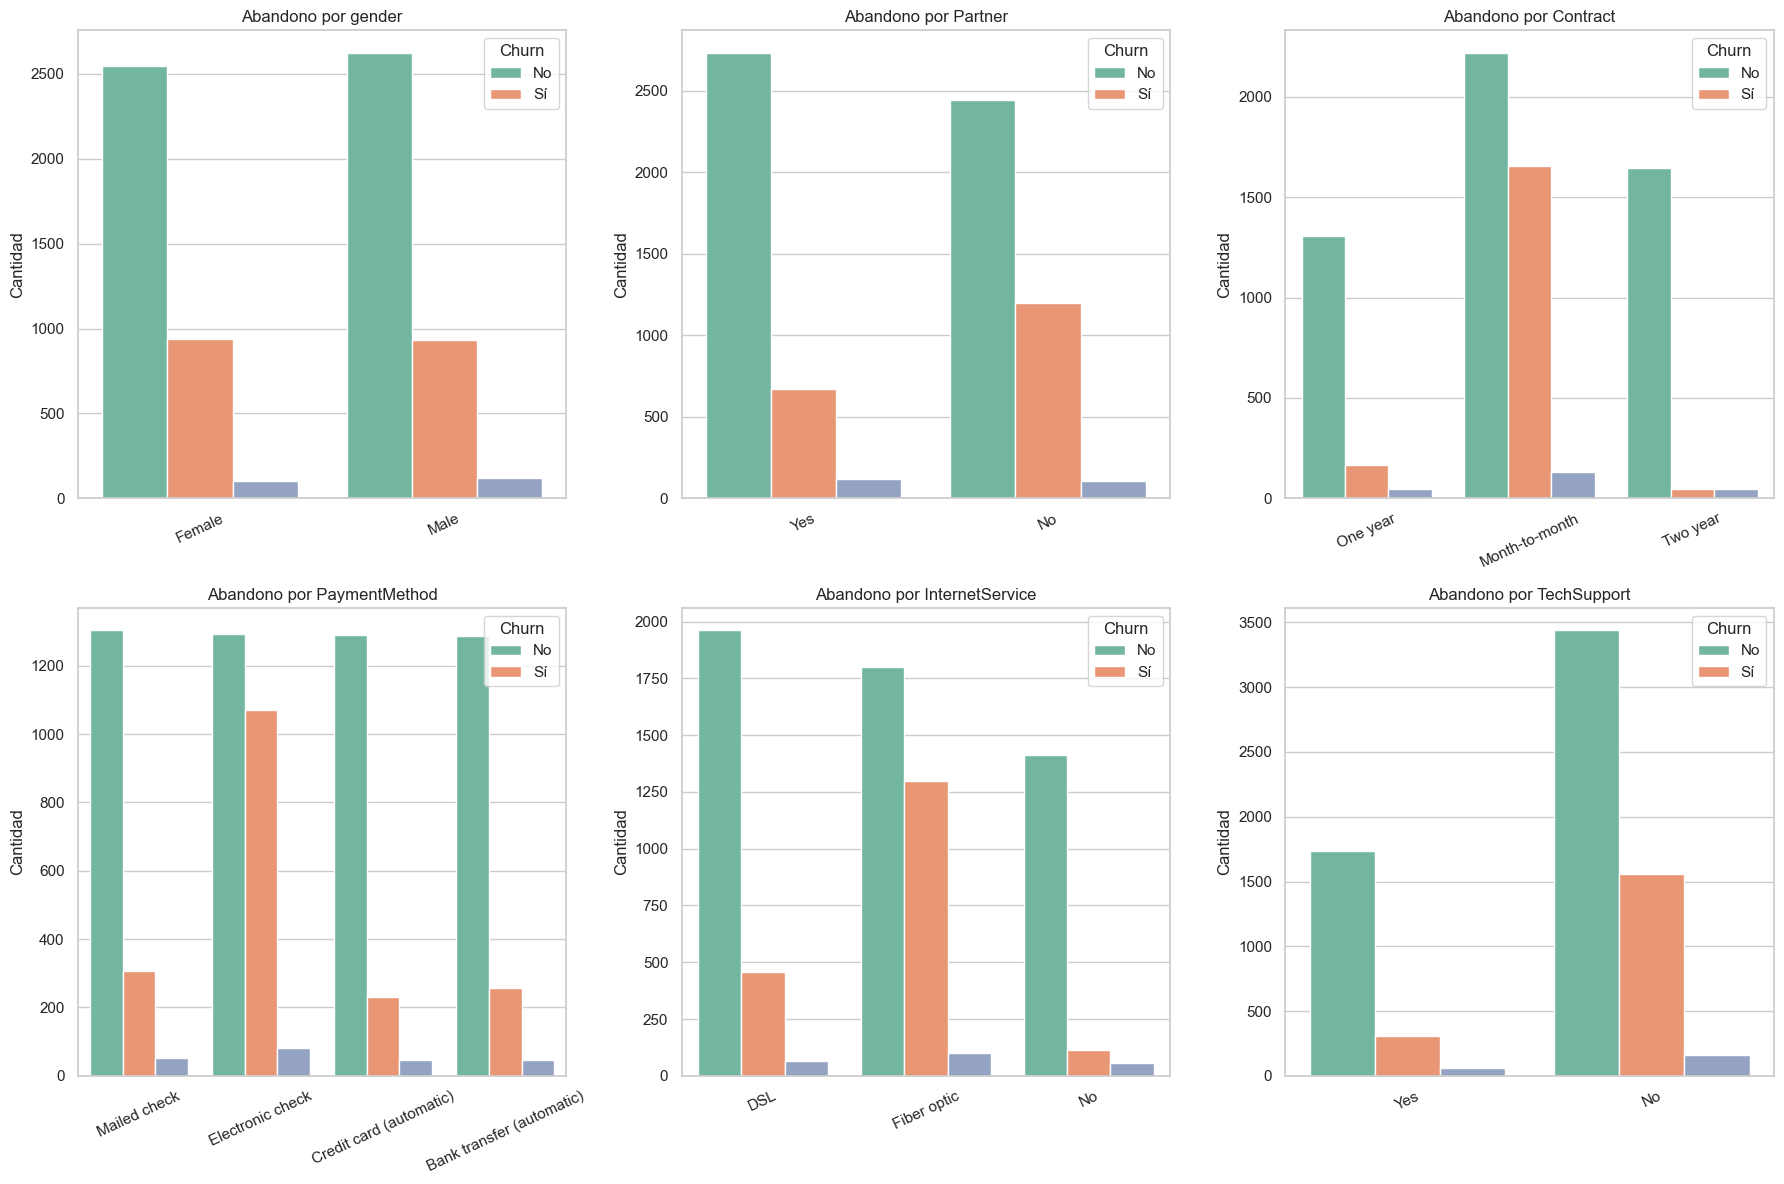

In [102]:
# Recuento de evasión por variables categóricas
# Variables categóricas clave para analizar
cat_cols = [
    'customer.gender', 
    'customer.Partner', 
    'account.Contract', 
    'account.PaymentMethod', 
    'internet.InternetService', 
    'internet.TechSupport'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    # Usamos hue='Churn' para dividir las barras por abandono
    # Convertimos Churn a string temporalmente para que la leyenda sea clara
    ax = sns.countplot(x=col, hue='Churn', data=df_final, palette='Set2')
    
    plt.title(f'Abandono por {col.split(".")[-1]}') # Título limpio
    plt.xlabel('')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=25) # Rotar textos largos
    plt.legend(title='Churn', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()


In [ ]:
# Conteo de evasión por variables numéricas
print("\n---- Análisis por Churn (Abandono) ----")
# Seleccionamos las columnas numéricas más relevantes
numeric_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
# Calculamos media, mediana y desviación estándar agrupando por Churn
churn_analysis = df_final.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std'])
print(churn_analysis)

#📄Informe final

In [ ]:
# 📄 Informe Final de Análisis de Evasión de Clientes (Churn)

## 1. Introducción
**Objetivo:** El propósito de este análisis es identificar los principales factores que contribuyen a la evasión de clientes (Churn) en la empresa de telecomunicaciones TelecomX.

**Problema:** La pérdida de clientes representa un costo significativo. Comprender el perfil de los clientes que abandonan el servicio permite diseñar estrategias de retención efectivas y mejorar la rentabilidad a largo plazo.

## 2. Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se realizaron los siguientes pasos:
*   **Carga y Normalización:** Se cargaron los datos desde un JSON anidado, utilizando `json_normalize` para aplanar columnas complejas como `Customer` y `Phone`.
*   **Conversión de Tipos:** Se corrigió la columna `account.Charges.Total`, convirtiéndola de texto a numérico y gestionando valores vacíos.
*   **Estandarización:** Se simplificaron variables categóricas (ej. cambiando "No internet service" a "No") y se convirtieron variables binarias ("Yes"/"No") a formato numérico (1/0) para facilitar el cálculo de correlaciones.
*   **Ingeniería de Características:** Se creó la variable `Cuentas_Diarias` para analizar el gasto diario promedio.

## 3. Análisis Exploratorio de Datos (EDA)
A través de visualizaciones y estadísticas descriptivas, observamos:
*   **Distribución de Churn:** Existe un desbalance de clases; la mayoría de los clientes se quedan, pero el porcentaje de fuga es considerable (aprox. 26%).
*   **Factores de Riesgo Identificados:**
    *   **Contratos:** Los clientes con contratos **mensuales (Month-to-month)** tienen una tasa de fuga drásticamente mayor que aquellos con contratos de 1 o 2 años.
    *   **Método de Pago:** El pago mediante **Cheque Electrónico (Electronic check)** está altamente correlacionado con el abandono.
    *   **Servicio de Internet:** Los usuarios de **Fibra Óptica** tienden a irse más que los de DSL, lo que sugiere posibles problemas de satisfacción o precio en este servicio.
    *   **Antigüedad:** Los clientes nuevos (baja `tenure`) son los más vulnerables a cancelar.

## 4. Conclusiones e Insights
Los datos sugieren que la fuga no es aleatoria, sino que está impulsada por la **flexibilidad contractual y posibles insatisfacciones** en servicios premium (Fibra + Cheque Electrónico).
- Los clientes no comprometidos a largo plazo se van con facilidad.
- Existe un problema específico con el segmento de Fibra Óptica/Cheque Electrónico que requiere investigación cualitativa (¿Precio? ¿Calidad técnica?).

## 5. Recomendaciones Estratégicas
1.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos agresivos o beneficios exclusivos por migrar de contrato mensual a anual para reducir la volatilidad.
2.  **Revisión del Servicio de Fibra Óptica:** Realizar encuestas de satisfacción específicas a clientes de fibra para detectar si el problema es técnico o de relación calidad-precio.
3.  **Programa de "Onboarding" para Nuevos Clientes:** Dado que el riesgo es mayor al inicio (`tenure` bajo), implementar un seguimiento personalizado durante los primeros 3 meses.
4.  **Promoción de Pagos Automáticos:** Incentivar el uso de tarjeta de crédito o transferencia automática en lugar de cheques electrónicos, ya que estos métodos suelen asociarse a mayor fidelidad.